In [160]:
import sqlite3
import datetime as dt

In [161]:
file = open("C:\\DataSets\\OnlineRetail2Sample.csv")
data1 = file.readlines()
data = data1[1:]

In [162]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

Opened database successfully


In [158]:
conn.execute('''CREATE TABLE RFMDM_TEMP (
    InvoiceNo   CHAR (20),
    StockCode   CHAR (20),
    Quantity    INTEGER,
    DoP         DATE,
    UnitPrice   FLOAT,
    CustomerID  CHAR (30));''')
print ("Table created successfully")

#conn.close()

Table created successfully


In [163]:
for row in data:
    #iData = data[row].split(sep = ",")
    iData = row.split(sep = ",")
    #print(iData)
    InvoiceNo = iData[0]
    StockCode = iData[1]
    Quantity = iData[2]
    DoP = iData[3]
    UnitPrice = iData[4]
    CustomerID = iData[5]

    #print(InvoiceNo, StockCode, Quantity, DoP, UnitPrice, CustomerID)

    #sql = 'INSERT INTO RFMDM (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID) \
    #      VALUES (' + 536365 , 71053, 6, \'12/1/2010\', 3.39, 17850)"

    sql = "INSERT INTO RFMDM_TEMP (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID) \
          VALUES (" + "\'" + InvoiceNo + "\',\'"+ StockCode + "\',"+ Quantity  + ','+ "\'" + DoP + "\'" +','+ UnitPrice +',' + CustomerID + " )"
    #print(sql)
    conn.execute(sql)
conn.commit()    
conn.close()
print("Commit successful")

Commit successful


In [164]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMDM_TEMP limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('536365', '85123A', 6, '12/1/2010', 2.55, '17850'), ('536365', '71053', 6, '12/1/2010', 3.39, '17850'), ('536365', '84406B', 8, '12/1/2010', 2.75, '17850'), ('536365', '84029G', 6, '12/1/2010', 3.39, '17850'), ('536365', '84029E', 6, '12/1/2010', 3.39, '17850')]


#Run delete query in the table rfmdm
select count(*) from RFMDM_TEMP
-- 406829

select count(*) from RFMDM_TEMP where StockCode in ('POST', 'D', 'BANK CHARGES', 'C2', 'CRUK', 'DOT', 'M', 'PADS')

--1920

delete from rfmdm where StockCode in ('POST', 'D', 'BANK CHARGES', 'C2', 'CRUK', 'DOT', 'M', 'PADS')
select count(*) from RFMDM_TEMP where Quantity<0

--8359 (2%)

delete from RFMDM_TEMP where quantity <0

In [165]:
import pandas as pd

In [172]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmdm = pd.read_sql("select * from RFMDM_TEMP",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [173]:
rfmdm.head()

InvoiceNo StockCode  Quantity        DoP  UnitPrice CustomerID
0    536365    85123A         6  12/1/2010       2.55      17850
1    536365     71053         6  12/1/2010       3.39      17850
2    536365    84406B         8  12/1/2010       2.75      17850
3    536365    84029G         6  12/1/2010       3.39      17850
4    536365    84029E         6  12/1/2010       3.39      17850

In [174]:
rfmdm.dtypes

InvoiceNo      object
StockCode      object
Quantity        int64
DoP            object
UnitPrice     float64
CustomerID     object
dtype: object

In [175]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select count(*) from RFMDM_TEMP")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(396370,)]


In [176]:
rfmdm['DoP'] = pd.to_datetime(rfmdm['DoP'])
print("Converted successfully")

Converted successfully


In [177]:
rfmdm.dtypes

InvoiceNo             object
StockCode             object
Quantity               int64
DoP           datetime64[ns]
UnitPrice            float64
CustomerID            object
dtype: object

In [ ]:
#Fix datetime format issue

In [180]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE RFMDM''')
conn.commit()
rfmdm.to_sql('rfmdm',conn,if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [181]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select distinct(DoP) from RFMDM limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('2010-12-01 00:00:00',), ('2010-12-02 00:00:00',), ('2010-12-03 00:00:00',), ('2010-12-05 00:00:00',), ('2010-12-06 00:00:00',)]


In [202]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
#cursor.execute('''DROP TABLE RFMSEG_TEMP''')
#conn.commit()
#conn.execute('''drop table rfmseg''')
conn.execute('''CREATE TABLE RFMSEG_TEMP (
    CustomerID  CHAR (20),
    RDate   DATE,
    Frequency    INTEGER,
    Product INTEGER,
    TDate         DATE,
    Monetary   FLOAT)''')
print ("Table created successfully")

conn.close()

Opened database successfully
Table created successfully


In [ ]:
insert data into rfmseg table using the following sql command
    INSERT INTO RFMSEG_TEMP
       SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM
       group by customerid

In [203]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMSEG_TEMP limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('12346', '2011-01-18 00:00:00', 1, 1, '2011-01-18 00:00:00', 77183.6), ('12347', '2011-12-07 00:00:00', 7, 103, '2010-12-07 00:00:00', 4309.999999999997), ('12348', '2011-09-25 00:00:00', 4, 21, '2010-12-16 00:00:00', 1437.24), ('12349', '2011-11-21 00:00:00', 1, 72, '2011-11-21 00:00:00', 1457.55), ('12350', '2011-02-02 00:00:00', 1, 16, '2011-02-02 00:00:00', 294.40000000000003)]


In [204]:
print(max(rfmdm['DoP']))

2011-12-09 00:00:00


In [205]:
print(min(rfmdm['DoP']))

2010-12-01 00:00:00


In [206]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table RFMSEG_TEMP \
            add column Recency INTEGER \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table RFMSEG_TEMP             add column Recency INTEGER         
Column added successfully


In [207]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table RFMSEG_TEMP \
            add column Tenure INTEGER \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table RFMSEG_TEMP             add column Tenure INTEGER         
Column added successfully


In [208]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmseg = pd.read_sql("select * from RFMSEG_TEMP",conn)
print ("records added to dataframe rfmseg successfully")
conn.close()

Opened database successfully
records added to dataframe rfmseg successfully


In [209]:
rfmseg.head()
#print(rfmseg['Recency'])

CustomerID                RDate  Frequency  Product                TDate  \
0      12346  2011-01-18 00:00:00          1        1  2011-01-18 00:00:00   
1      12347  2011-12-07 00:00:00          7      103  2010-12-07 00:00:00   
2      12348  2011-09-25 00:00:00          4       21  2010-12-16 00:00:00   
3      12349  2011-11-21 00:00:00          1       72  2011-11-21 00:00:00   
4      12350  2011-02-02 00:00:00          1       16  2011-02-02 00:00:00   

   Monetary Recency Tenure  
0  77183.60    None   None  
1   4310.00    None   None  
2   1437.24    None   None  
3   1457.55    None   None  
4    294.40    None   None

In [210]:

NOW = dt.datetime(2011,12,10)
print(NOW)

2011-12-10 00:00:00


In [211]:
rfmseg['NOW'] = NOW
rfmseg.head()

CustomerID                RDate  Frequency  Product                TDate  \
0      12346  2011-01-18 00:00:00          1        1  2011-01-18 00:00:00   
1      12347  2011-12-07 00:00:00          7      103  2010-12-07 00:00:00   
2      12348  2011-09-25 00:00:00          4       21  2010-12-16 00:00:00   
3      12349  2011-11-21 00:00:00          1       72  2011-11-21 00:00:00   
4      12350  2011-02-02 00:00:00          1       16  2011-02-02 00:00:00   

   Monetary Recency Tenure        NOW  
0  77183.60    None   None 2011-12-10  
1   4310.00    None   None 2011-12-10  
2   1437.24    None   None 2011-12-10  
3   1457.55    None   None 2011-12-10  
4    294.40    None   None 2011-12-10

In [212]:
rfmseg.dtypes

CustomerID            object
RDate                 object
Frequency              int64
Product                int64
TDate                 object
Monetary             float64
Recency               object
Tenure                object
NOW           datetime64[ns]
dtype: object

In [213]:
#convert to datetime format
#rfmseg['NOW'] = pd.to_datetime(rfmseg['NOW'])
rfmseg['TDate'] = pd.to_datetime(rfmseg['TDate'])
rfmseg['RDate'] = pd.to_datetime(rfmseg['RDate'])
rfmseg.head()

CustomerID      RDate  Frequency  Product      TDate  Monetary Recency  \
0      12346 2011-01-18          1        1 2011-01-18  77183.60    None   
1      12347 2011-12-07          7      103 2010-12-07   4310.00    None   
2      12348 2011-09-25          4       21 2010-12-16   1437.24    None   
3      12349 2011-11-21          1       72 2011-11-21   1457.55    None   
4      12350 2011-02-02          1       16 2011-02-02    294.40    None   

  Tenure        NOW  
0   None 2011-12-10  
1   None 2011-12-10  
2   None 2011-12-10  
3   None 2011-12-10  
4   None 2011-12-10

In [214]:
rfmseg.dtypes

CustomerID            object
RDate         datetime64[ns]
Frequency              int64
Product                int64
TDate         datetime64[ns]
Monetary             float64
Recency               object
Tenure                object
NOW           datetime64[ns]
dtype: object

In [215]:
rfmseg['Recency'] = (rfmseg['NOW'] - rfmseg['RDate']).dt.days
rfmseg['Tenure'] = (rfmseg['NOW'] - rfmseg['TDate']).dt.days
rfmseg.head()

CustomerID      RDate  Frequency  Product      TDate  Monetary  Recency  \
0      12346 2011-01-18          1        1 2011-01-18  77183.60      326   
1      12347 2011-12-07          7      103 2010-12-07   4310.00        3   
2      12348 2011-09-25          4       21 2010-12-16   1437.24       76   
3      12349 2011-11-21          1       72 2011-11-21   1457.55       19   
4      12350 2011-02-02          1       16 2011-02-02    294.40      311   

   Tenure        NOW  
0     326 2011-12-10  
1     368 2011-12-10  
2     359 2011-12-10  
3      19 2011-12-10  
4     311 2011-12-10

In [216]:
del rfmseg['NOW']
rfmseg.head()

CustomerID      RDate  Frequency  Product      TDate  Monetary  Recency  \
0      12346 2011-01-18          1        1 2011-01-18  77183.60      326   
1      12347 2011-12-07          7      103 2010-12-07   4310.00        3   
2      12348 2011-09-25          4       21 2010-12-16   1437.24       76   
3      12349 2011-11-21          1       72 2011-11-21   1457.55       19   
4      12350 2011-02-02          1       16 2011-02-02    294.40      311   

   Tenure  
0     326  
1     368  
2     359  
3      19  
4     311

In [220]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
#cursor = conn.cursor()
#cursor.execute('''DROP TABLE RFMSEG''')
#conn.commit()
rfmseg.to_sql('RFMSEG',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table RFMSEG got created successfully")
conn.close()

Opened database successfully
new table RFMSEG got created successfully


In [219]:
rfmseg.describe()

Frequency      Product       Monetary      Recency       Tenure
count  4335.000000  4335.000000    4335.000000  4335.000000  4335.000000
mean      4.245675    61.413149    2021.007301    93.208535   223.785928
std       7.636337    85.304170    8906.526607   100.170816   117.867218
min       1.000000     1.000000       0.000000     1.000000     1.000000
25%       1.000000    16.000000     305.410000    18.000000   113.000000
50%       2.000000    35.000000     668.110000    51.000000   249.000000
75%       5.000000    77.000000    1631.475000   143.000000   327.000000
max     206.000000  1785.000000  279138.020000   374.000000   374.000000

In [27]:
rfmseg.shape

(4335, 8)

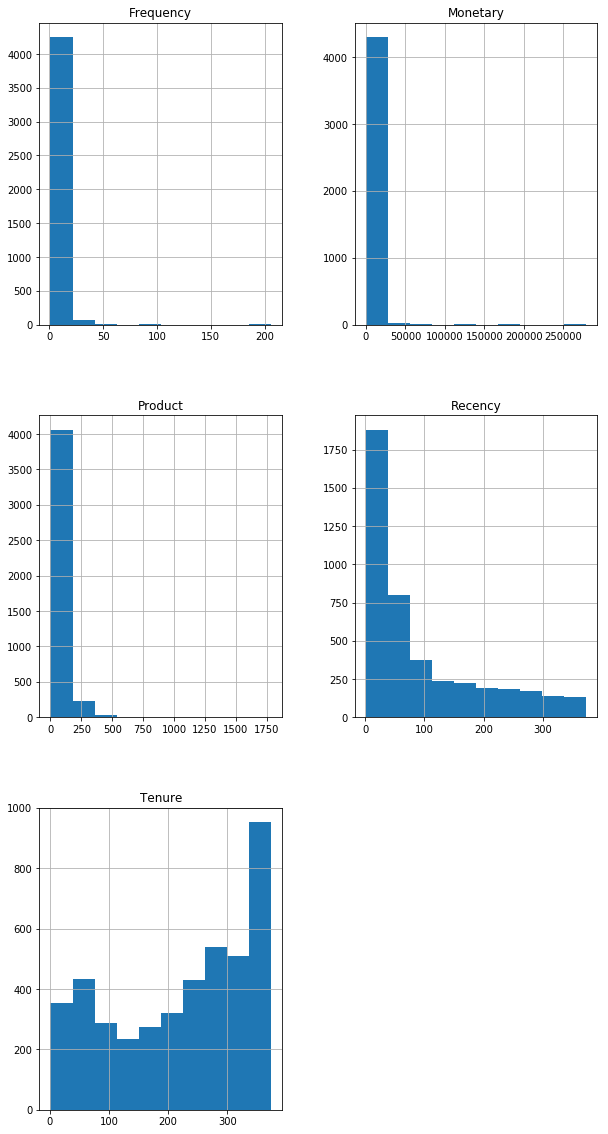

In [28]:
import matplotlib.pyplot as plt
rfmseg.hist(figsize = (10,20))
plt.show()

In [184]:
#plt.boxplot(rfmseg["Frequency"])
#plt.show()

In [19]:
rfmseg.describe()

Frequency      Product       Monetary      Recency       Tenure
count  4335.000000  4335.000000    4335.000000  4335.000000  4335.000000
mean      4.245675    61.413149    2021.007301    93.208535   223.785928
std       7.636337    85.304170    8906.526607   100.170816   117.867218
min       1.000000     1.000000       0.000000     1.000000     1.000000
25%       1.000000    16.000000     305.410000    18.000000   113.000000
50%       2.000000    35.000000     668.110000    51.000000   249.000000
75%       5.000000    77.000000    1631.475000   143.000000   327.000000
max     206.000000  1785.000000  279138.020000   374.000000   374.000000

In [20]:
quantiles = rfmseg.quantile(q=[0.2,0.4,0.6,0.8])
quantiles

Frequency  Product  Monetary  Recency  Tenure
0.2        1.0     13.0   248.356     15.0    81.0
0.4        2.0     26.0   484.644     33.0   206.0
0.6        3.0     48.0   925.050     72.0   282.0
0.8        5.0     92.0  2043.328    180.0   354.0

In [21]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 5.0},
 'Monetary': {0.2: 248.356,
  0.4: 484.644,
  0.6: 925.0500000000001,
  0.8: 2043.3279999999997},
 'Product': {0.2: 13.0, 0.4: 26.0, 0.6: 48.0, 0.8: 92.0},
 'Recency': {0.2: 15.0, 0.4: 33.0, 0.6: 72.0, 0.8: 180.0},
 'Tenure': {0.2: 81.0, 0.4: 206.0, 0.6: 282.0, 0.8: 354.0}}

In [22]:
rfmSegmentation = rfmseg
#rfmSegmentation.head()

In [23]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [24]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [25]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [26]:
rfmSegmentation.head()

CustomerID      RDate  Frequency  Product      TDate  Monetary  Recency  \
0      12346 2011-01-18          1        1 2011-01-18  77183.60      326   
1      12347 2011-12-07          7      103 2010-12-07   4310.00        3   
2      12348 2011-09-25          4       21 2010-12-16   1437.24       76   
3      12349 2011-11-21          1       72 2011-11-21   1457.55       19   
4      12350 2011-02-02          1       16 2011-02-02    294.40      311   

   Tenure  R_Quartile  F_Quartile  M_Quartile RFMClass  
0     326           1           1           5      115  
1     368           5           5           5      555  
2     359           2           4           4      244  
3      19           4           1           4      414  
4     311           1           1           2      112

#refer to http://www.blastam.com/blog/rfm-analysis-boosts-sales
https://www.putler.com/rfm-analysis/
https://medium.com/@jackiekhuu.work/customer-segmentation-rfm-analysis-8007d62101cc

In [50]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmSegmentation.to_sql('rfmsegmentation',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [51]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table rfmsegmentation \
            add column Segment VARCHAR(50) \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table rfmsegmentation             add column Segment VARCHAR(50)         
Column added successfully


<img src="C:\\DataSets\\RFM_Segmentation.png">

#run the following sql queries


update rfmsegmentation set Segment = "Champions" where R_Quartile in (4,5) and F_Quartile in (4,5) and M_Quartile in (4,5)

update rfmsegmentation set Segment = "Loyal Customers" where R_Quartile in (2,3,4,5) and F_Quartile in (3,4,5) and M_Quartile in (3,4,5)

update rfmsegmentation set Segment = "Potential Loyalist" where R_Quartile in (3,4,5) and F_Quartile in (1,2,3) and M_Quartile in (1,2,3)


update rfmsegmentation set Segment = "New Customers" where R_Quartile in (4,5) and F_Quartile = 1 and M_Quartile = 1

update rfmsegmentation set Segment = "Promising" where R_Quartile in (2,4) and F_Quartile = 1 and M_Quartile = 1

update rfmsegmentation set Segment = "Customer Needing Attention" where R_Quartile in (2,3) and F_Quartile in (2,3) and M_Quartile in (2,3)

update rfmsegmentation set Segment = "About To Sleep" where R_Quartile in (2,3) and F_Quartile in (1,2) and M_Quartile in (1,2)

update rfmsegmentation set Segment = "At Risk" where R_Quartile in (1,2) and F_Quartile in (2,3,4,5) and M_Quartile in (2,3,4,5)

update rfmsegmentation set Segment = "Can't Lose Them" where R_Quartile = 1 and F_Quartile in (4,5) and M_Quartile in (4,5)

update rfmsegmentation set Segment = "Lost" where R_Quartile in (1,2) and F_Quartile in (1,2) and M_Quartile in (1,2)

select count(*) from rfmsegmentation where Segment is null -- 319

In [27]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from rfmsegmentation limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(0, 0, '12346', '2011-01-18 00:00:00', 1, 1, '2011-01-18 00:00:00', 77183.6, 326, 326, 1, 1, 5, '115', None), (1, 1, '12347', '2011-12-07 00:00:00', 7, 103, '2010-12-07 00:00:00', 4309.999999999997, 3, 368, 5, 5, 5, '555', 'Loyal Customers'), (2, 2, '12348', '2011-09-25 00:00:00', 4, 21, '2010-12-16 00:00:00', 1437.24, 76, 359, 2, 4, 4, '244', 'At Risk'), (3, 3, '12349', '2011-11-21 00:00:00', 1, 72, '2011-11-21 00:00:00', 1457.55, 19, 19, 4, 1, 4, '414', None), (4, 4, '12350', '2011-02-02 00:00:00', 1, 16, '2011-02-02 00:00:00', 294.40000000000003, 311, 311, 1, 1, 2, '112', 'Lost')]


In [28]:
#drop the df and create again
rfmSegmentation.drop

<bound method NDFrame.drop of      CustomerID      RDate  Frequency  Product      TDate  Monetary  Recency  \
0         12346 2011-01-18          1        1 2011-01-18  77183.60      326   
1         12347 2011-12-07          7      103 2010-12-07   4310.00        3   
2         12348 2011-09-25          4       21 2010-12-16   1437.24       76   
3         12349 2011-11-21          1       72 2011-11-21   1457.55       19   
4         12350 2011-02-02          1       16 2011-02-02    294.40      311   
5         12352 2011-11-03          7       57 2011-02-16   1385.74       37   
6         12353 2011-05-19          1        4 2011-05-19     89.00      205   
7         12354 2011-04-21          1       58 2011-04-21   1079.40      233   
8         12355 2011-05-09          1       13 2011-05-09    459.40      215   
9         12356 2011-11-17          3       52 2011-01-18   2487.43       23   
10        12357 2011-11-06          1      131 2011-11-06   6207.67       34   
11        

In [29]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmSegmentation = pd.read_sql("select * from rfmsegmentation",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [221]:
del rfmSegmentation['level_0']
del rfmSegmentation['index']
rfmSegmentation.head()

CustomerID                RDate  Frequency  Product                TDate  \
0      12346  2011-01-18 00:00:00          1        1  2011-01-18 00:00:00   
1      12347  2011-12-07 00:00:00          7      103  2010-12-07 00:00:00   
2      12348  2011-09-25 00:00:00          4       21  2010-12-16 00:00:00   
3      12349  2011-11-21 00:00:00          1       72  2011-11-21 00:00:00   
4      12350  2011-02-02 00:00:00          1       16  2011-02-02 00:00:00   

   Monetary  Recency  Tenure  R_Quartile  F_Quartile  M_Quartile RFMClass  \
0  77183.60      326     326           1           1           5      115   
1   4310.00        3     368           5           5           5      555   
2   1437.24       76     359           2           4           4      244   
3   1457.55       19      19           4           1           4      414   
4    294.40      311     311           1           1           2      112   

           Segment  
0             None  
1  Loyal Customers  
2          At Risk  
3             None  
4             Lost

In [31]:
import matplotlib.pyplot as plt
rfmSegmentation.groupby(['Segment'])['CustomerID'].count()

Segment
About To Sleep                 311
At Risk                        561
Can't Lose Them                 18
Customer Needing Attention     131
Lost                           957
Loyal Customers               1421
New Customers                   43
Potential Loyalist             489
Promising                       85
Name: CustomerID, dtype: int64

In [32]:
#create time dimention table

In [142]:
df1 = rfmdm.filter(['DoP'], axis=1)
df1.head()

DoP
0 2010-12-01
1 2010-12-01
2 2010-12-01
3 2010-12-01
4 2010-12-01

In [143]:
df2 = df1.drop_duplicates('DoP')
#df1.index = range(len(df1.index))
df2.head()

DoP
0    2010-12-01
1936 2010-12-02
3934 2010-12-03
5027 2010-12-05
7723 2010-12-06

In [144]:
df2.reset_index(inplace=True)
df2['Time_Id'] = df2.index
df2.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


index        DoP  Time_Id
0      0 2010-12-01        0
1   1936 2010-12-02        1
2   3934 2010-12-03        2
3   5027 2010-12-05        3
4   7723 2010-12-06        4

In [145]:
df3 = pd.merge(df1, df2, on='DoP', how='left')
time_dimension = df3.filter(['DoP','Time_Id'], axis = 1)
time_dimension.tail()

#df3.tail()

DoP  Time_Id
396365 2011-12-09      304
396366 2011-12-09      304
396367 2011-12-09      304
396368 2011-12-09      304
396369 2011-12-09      304

In [110]:
#time_dimension.insert(0, 'Time_ID', range(1,1+len(time_dimension_df)))
#time_dimension.head()

In [146]:
time_dimension['Year'] = time_dimension['DoP'].dt.year
time_dimension['Month'] = time_dimension['DoP'].dt.month
time_dimension['Qtr'] = time_dimension['DoP'].dt.quarter
time_dimension.head()

DoP  Time_Id  Year  Month  Qtr
0 2010-12-01        0  2010     12    4
1 2010-12-01        0  2010     12    4
2 2010-12-01        0  2010     12    4
3 2010-12-01        0  2010     12    4
4 2010-12-01        0  2010     12    4

In [147]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
time_dimension.to_sql('time_dimension',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


#sql query is not working
UPDATE pardm SET Time_ID = (SELECT time_dimension.Time_ID FROM time_dimension where pardm.DoP = time_dimension.DoP)

In [49]:
#create Product Analytical Data Mart (PARDM)

In [152]:
df4 = rfmdm.filter(['InvoiceNo','StockCode','DoP'], axis = 1)
df4.head()

InvoiceNo StockCode        DoP
0    536365    85123A 2010-12-01
1    536365     71053 2010-12-01
2    536365    84406B 2010-12-01
3    536365    84029G 2010-12-01
4    536365    84029E 2010-12-01

In [154]:
df5 = pd.merge(df4, df2, on='DoP', how='left')
#df5.head()
pardm = df5.filter(['InvoiceNo','StockCode','Time_Id'], axis = 1)
pardm.head()

InvoiceNo StockCode  Time_Id
0    536365    85123A        0
1    536365     71053        0
2    536365    84406B        0
3    536365    84029G        0
4    536365    84029E        0

In [155]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
pardm.to_sql('pardm',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [150]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table pardm \
            add column Time_ID VARCHAR(50) \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table pardm             add column Time_ID VARCHAR(50)         
Column added successfully
